In [1]:
import pandas as pd
import numpy as np

import matplotlib                  # 2D Plotting Library
import matplotlib.pyplot as plt
import seaborn as sns              # Python Data Visualization Library based on matplotlib
# import geopandas as gpd            # Python Geospatial Data Library
plt.style.use('fivethirtyeight')
%matplotlib inline

'''Plotly Visualizations'''
import plotly as plotly                # Interactive Graphing Library for Python
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)

In [2]:
# Read file

listings = pd.read_csv('listings.csv')
calendar = pd.read_csv('calendar.csv')
reviews = pd.read_csv('reviews.csv')

In [3]:
# Print listings dataset

listings.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47


In [4]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

# Data Cleaning

* Listings

In [5]:
# Check if "Summary" and "Description" columns are equivalent

listings['summary'].equals(listings['description'])

False

In [6]:
# Delete unecessary columns in the dataset

listings.drop(['listing_url', 'scrape_id', 'last_scraped', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_url', 'host_thumbnail_url', 'host_picture_url', 'neighbourhood_group_cleansed', 'country', 
              'country_code', 'has_availability', 'requires_license', 'license', 'jurisdiction_names'], 1, inplace = True)

In [7]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 78 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   name                              3585 non-null   object 
 2   summary                           3442 non-null   object 
 3   space                             2528 non-null   object 
 4   description                       3585 non-null   object 
 5   experiences_offered               3585 non-null   object 
 6   neighborhood_overview             2170 non-null   object 
 7   notes                             1610 non-null   object 
 8   transit                           2295 non-null   object 
 9   access                            2096 non-null   object 
 10  interaction                       2031 non-null   object 
 11  house_rules                       2393 non-null   object 
 12  host_i

In [8]:
# List all the columns have null/nan values
[col for col in listings.columns if listings[col].isnull().any()]

['summary',
 'space',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_neighbourhood',
 'neighbourhood',
 'city',
 'zipcode',
 'market',
 'property_type',
 'bathrooms',
 'bedrooms',
 'beds',
 'square_feet',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee',
 'first_review',
 'last_review',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month']

In [9]:
# Copy the dataframe
list_clean = listings.copy()

In [10]:
# drop the colunms with more than half of the missing value
cols = list_clean.columns[list_clean.isnull().sum()/list_clean.shape[0] > 0.5]
list_clean.drop(cols, axis=1, inplace=True)

In [11]:
# Fix datatype errors, extract numbers and change to int type
cols = ['host_response_rate', 'host_acceptance_rate', 'price', 'cleaning_fee', 'extra_people']
for col in cols:
    list_clean[col] = list_clean[col].str.extract(r'(\d+)')
    list_clean[col] = list_clean[col].astype('float128').astype('Int64')
list_clean[cols].dtypes

host_response_rate      Int64
host_acceptance_rate    Int64
price                   Int64
cleaning_fee            Int64
extra_people            Int64
dtype: object

In [12]:
# Change datatype for host_since
list_clean['host_since'] = pd.to_datetime(list_clean.host_since)
temp = pd.to_datetime('12/31/2019')

list_clean['host_len'] = list_clean.host_since.apply(lambda x: pd.Timedelta(temp-x).days)
list_clean = list_clean.drop('host_since', axis=1)

# extract the number of amenities 
list_clean['n_amenities'] = list_clean['amenities'].apply(lambda x: len(x.replace('{', '').\
                        replace('{', '').replace('"', '').split(',')))
list_clean.drop('amenities', axis=1, inplace=True)

In [13]:
df_num = list_clean.select_dtypes(include=['int', 'float'])

In [14]:
# fill na for the columns
int_fillmean = lambda x: x.fillna(round(x.mean()))
df_num = df_num.apply(int_fillmean, axis=0)
df_num = df_num.drop(['id', 'host_id', 'latitude', 'longitude'], axis=1).astype(float)

In [15]:
# Next let's look at the categorical values
df_cat = list_clean.select_dtypes(include=['object'])
# we will drop few description lines for future analysis
df_cat = df_cat.drop(['name', 'summary', 'description', 'experiences_offered', 'host_about', 
                      'host_verifications', 'host_name'], axis=1)

In [16]:
# find the not na rows with True
df_cat['with_inter'] = df_cat.interaction.notna().astype('object')
df_cat['with_access']= df_cat.access.notna().astype('object')
df_cat['with_rules'] = df_cat.house_rules.notna().astype('object')
df_cat['with_transit'] = df_cat.transit.notna().astype('object')
df_cat = df_cat.drop(['transit', 'access', 'interaction', 'house_rules'], axis=1)

In [17]:
df_cat = pd.concat([df_cat, list_clean.price], axis=1)
df_cat = df_cat[df_cat['price'] != 1]
df_cat = df_cat[df_cat['price'] < 423]

In [18]:
# get dummy values for categorical features
df_cat_dummies = pd.get_dummies(df_cat.iloc[:,:-1], dummy_na=False)

In [19]:
# concatenate the model df
df_mod = pd.concat([df_num, df_cat_dummies], axis=1)

# Boston Airbnb Market Overview

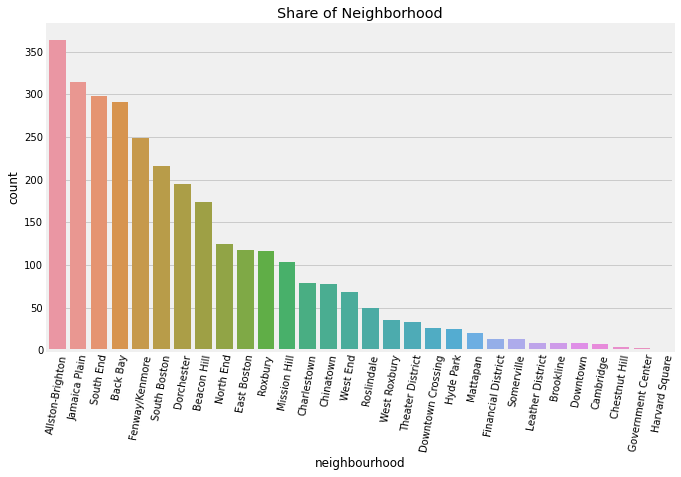

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(x='neighbourhood', data=listings, order=listings['neighbourhood'].value_counts().index)
plt.title('Share of Neighborhood')
plt.xticks(rotation=80)
plt.show()

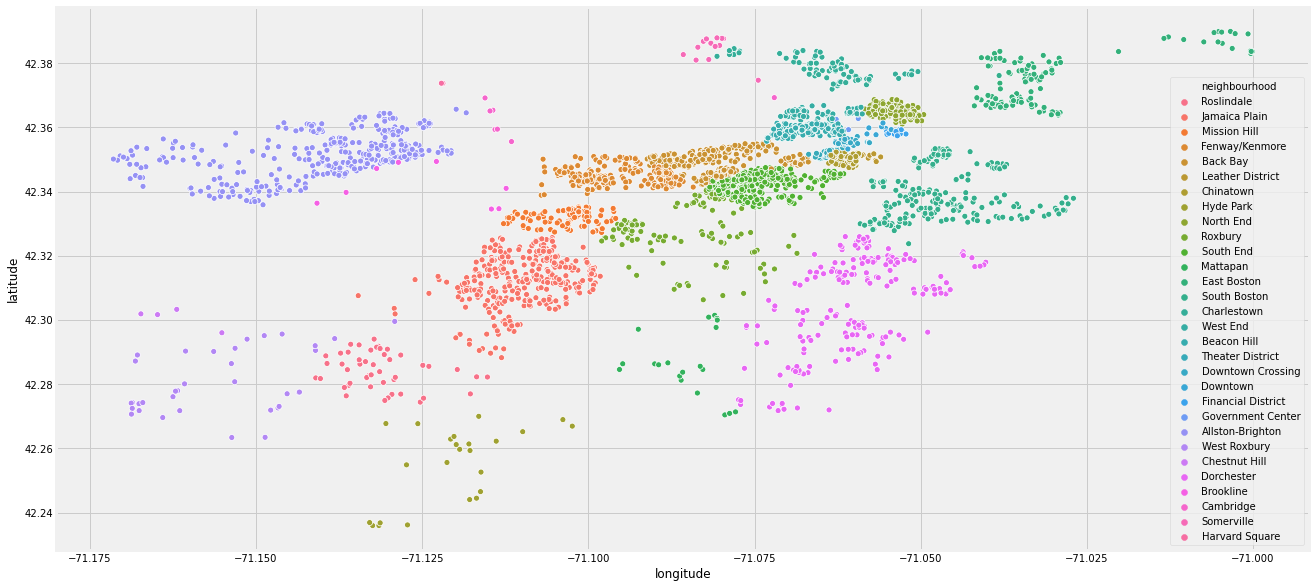

In [21]:
plt.figure(figsize=(20,10))
sns.scatterplot(listings.longitude,listings.latitude, hue=listings.neighbourhood)
plt.ioff()

In [22]:
import folium
from folium.plugins import HeatMap
m=folium.Map([42.3601,-71.0589],zoom_start=11)
HeatMap(listings[['latitude','longitude']].dropna(), radius=8, gradient={0.2:'blue',0.4:'purple',0.6:'orange',0.8:'red'}).add_to(m)
display(m)

In [23]:
# s = listings['property_type'].value_counts()
# data = s.values
# label = s.index

# plt.bar(label, data, color = 'brown')
# plt.title('Share of Property Type')
# plt.xticks(rotation=80)
# for i, v in enumerate(data):
#     plt.text(i, v + 0.01, str(v), ha='center', va='bottom')
    
# fg2 = sns.countplot(x='property_type', data=listings, order=s.index)
# fg2.set_title('Share of Property Type')
# fg2.set_xticklabels(fg2.get_xticklabels(), rotation=80)
plt.show()

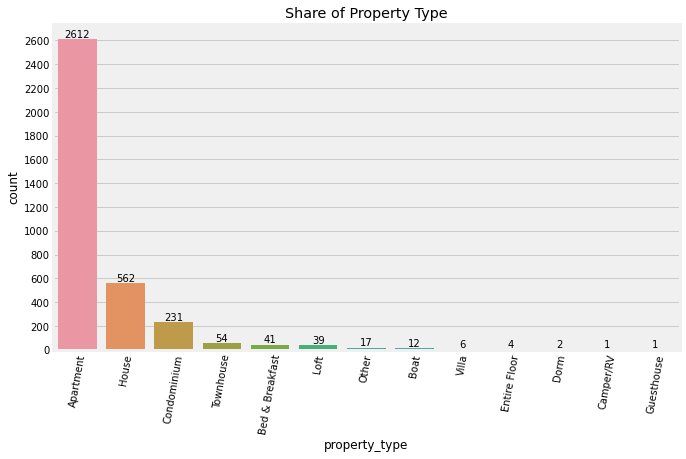

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'property_type',data = listings, order = listings['property_type'].value_counts().index)
plt.title("Share of Property Type")
plt.xticks(rotation=80)
plt.yticks(np.arange(0, 2650, 200))
for i, v in enumerate(listings['property_type'].value_counts().values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

In [25]:
# room_type = listings['room_type'].value_counts()

# plt.bar(room_type.index, room_type.values, color = 'orange')
# plt.title('Share of Room Type')
# plt.xticks(rotation=80)
# for i, v in enumerate(room_type.values):
#     plt.text(i, v + 0.01, str(v), ha='center', va='bottom')

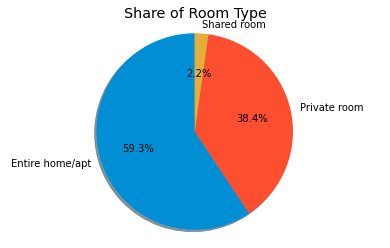

In [26]:
room_type = listings['room_type'].value_counts()
fig3, ax3 = plt.subplots()
ax3.pie(room_type.values, labels=room_type.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax3.set_title('Share of Room Type')
ax3.axis('equal')
plt.show()

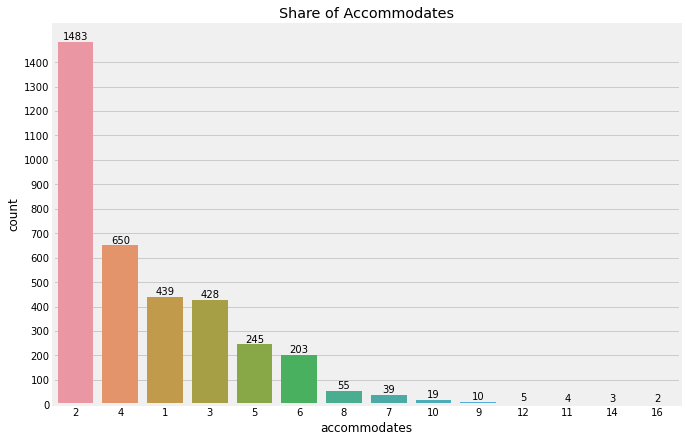

In [27]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'accommodates',data = listings, order = listings['accommodates'].value_counts().index)
plt.title("Share of Accommodates")
plt.yticks(np.arange(0, 1500, 100))
for i, v in enumerate(listings['accommodates'].value_counts().values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

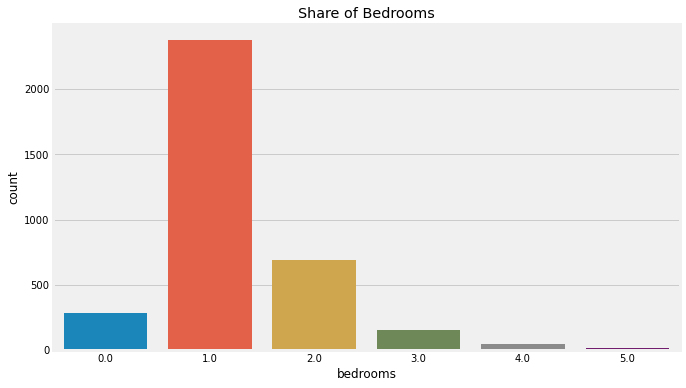

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'bedrooms',data = listings)
plt.title("Share of Bedrooms")
plt.show()

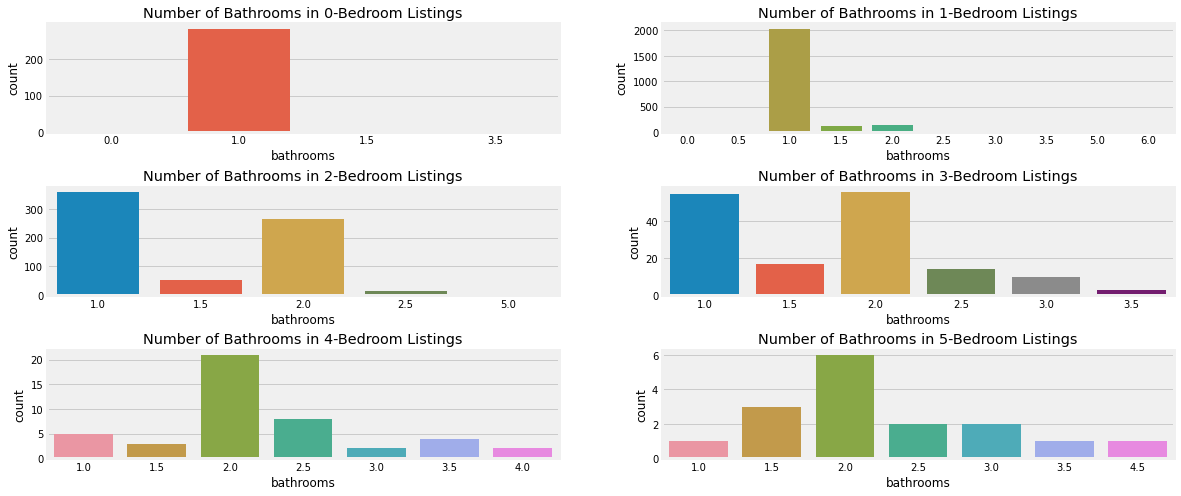

In [29]:
fig=plt.figure(figsize=(18,8))

plt.subplot(3,2,1)
sns.countplot(x='bathrooms',data=listings.loc[listings['bedrooms'] == 0])
plt.title('Number of Bathrooms in 0-Bedroom Listings')

plt.subplot(3,2,2)
sns.countplot(x='bathrooms',data=listings.loc[listings['bedrooms'] == 1])
plt.title('Number of Bathrooms in 1-Bedroom Listings')

plt.subplot(3,2,3)
sns.countplot(x='bathrooms',data=listings.loc[listings['bedrooms'] == 2])
plt.title('Number of Bathrooms in 2-Bedroom Listings')

plt.subplot(3,2,4)
sns.countplot(x='bathrooms',data=listings.loc[listings['bedrooms'] == 3])
plt.title('Number of Bathrooms in 3-Bedroom Listings')

plt.subplot(3,2,5)
sns.countplot(x='bathrooms',data=listings.loc[listings['bedrooms'] == 4])
plt.title('Number of Bathrooms in 4-Bedroom Listings')

plt.subplot(3,2,6)
sns.countplot(x='bathrooms',data=listings.loc[listings['bedrooms'] == 5])
plt.title('Number of Bathrooms in 5-Bedroom Listings')

plt.subplots_adjust(hspace= 0.5)
plt.show()

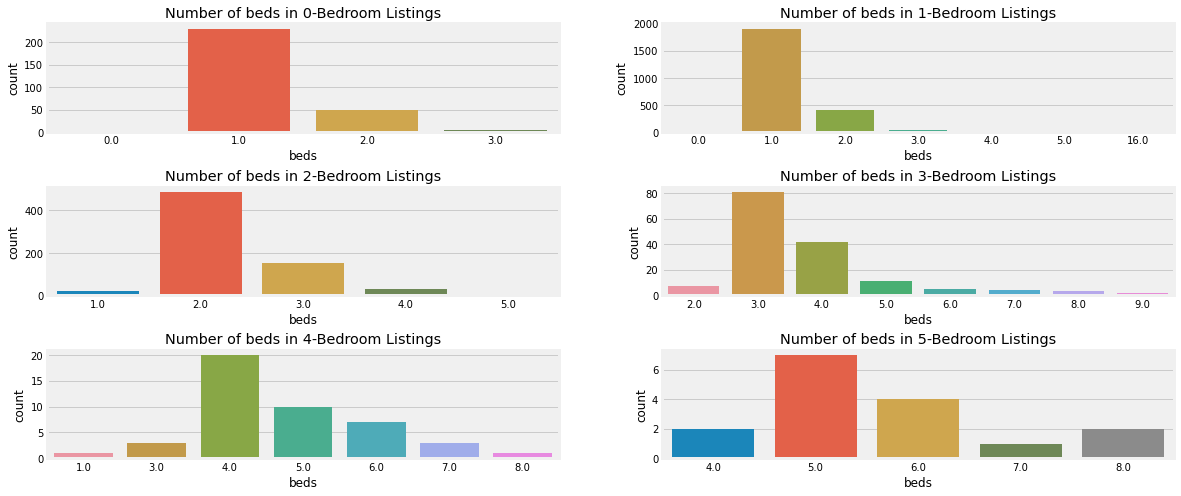

In [30]:
fig=plt.figure(figsize=(18,8))

plt.subplot(3,2,1)
sns.countplot(x='beds',data=listings.loc[listings['bedrooms'] == 0])
plt.title('Number of beds in 0-Bedroom Listings')

plt.subplot(3,2,2)
sns.countplot(x='beds',data=listings.loc[listings['bedrooms'] == 1])
plt.title('Number of beds in 1-Bedroom Listings')

plt.subplot(3,2,3)
sns.countplot(x='beds',data=listings.loc[listings['bedrooms'] == 2])
plt.title('Number of beds in 2-Bedroom Listings')

plt.subplot(3,2,4)
sns.countplot(x='beds',data=listings.loc[listings['bedrooms'] == 3])
plt.title('Number of beds in 3-Bedroom Listings')

plt.subplot(3,2,5)
sns.countplot(x='beds',data=listings.loc[listings['bedrooms'] == 4])
plt.title('Number of beds in 4-Bedroom Listings')

plt.subplot(3,2,6)
sns.countplot(x='beds',data=listings.loc[listings['bedrooms'] == 5])
plt.title('Number of beds in 5-Bedroom Listings')

plt.subplots_adjust(hspace= 0.5)
plt.show()

# Boston Airbnb Availability Overview

In [31]:
calendar.head(3)

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN


In [32]:
# convert date from string to datetime object

calendar["date"] = pd.to_datetime(calendar["date"])
calendar.date.describe()

count                 1308890
unique                    365
top       2016-12-27 00:00:00
freq                     3586
first     2016-09-06 00:00:00
last      2017-09-05 00:00:00
Name: date, dtype: object

In [33]:
# convert f to 0 (not available), and t to 1 (available)
calendar["available"]=calendar["available"].apply(lambda x:1 if x=="t" else 0)
calendar.available.value_counts()

0    665853
1    643037
Name: available, dtype: int64

In [34]:
calendar['day_of_week'] = calendar['date'].dt.dayofweek
availability_week = calendar.groupby('day_of_week')['available'].agg(['sum', 'mean']).reset_index()
availability_week.rename(columns={'sum': 'availability_count', 'mean':'availability'}, inplace=True)
availability_week

,day_of_week,availability_count,availability
0,0,92413,0.495586
1,1,93332,0.491071
2,2,91816,0.492385
3,3,91202,0.489092
4,4,90998,0.487998
5,5,91068,0.488374
6,6,92208,0.494487


In [35]:
# plt.figure(figsize=(10,8))
# #sns.set_style("darkgrid")
# ax = sns.lineplot(x=availability_week.day_of_week,y=availability_week.availability)
# ax.set(xlabel="Day of Week",ylabel="Availability", title="How does availability change throughout the week?")
# ax.set_xticks([0,1,2,3,4,5,6])
# ax.set_xticklabels(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])

# # set y tick values to % 
# y_tickvalue=['{:,.1f}'.format(x*100) + '%' for x in ax.get_yticks()]
# ax.set_yticklabels(y_tickvalue)
# plt.show()

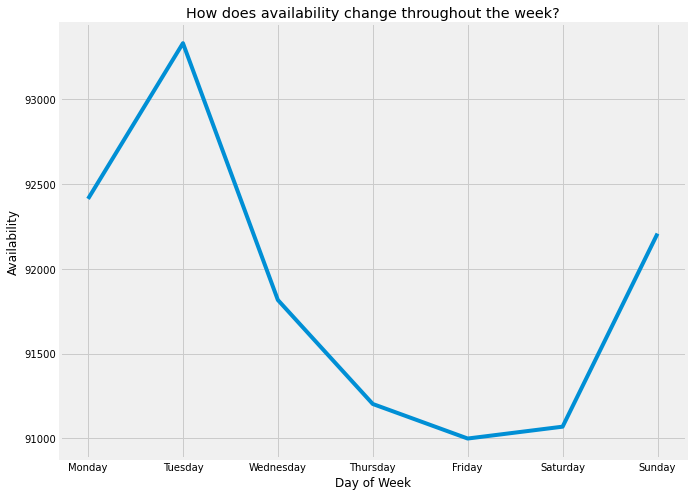

In [36]:
plt.figure(figsize=(10,8))
ax2 = sns.lineplot(x=availability_week.day_of_week, y=availability_week.availability_count)
ax2.set(xlabel='Day of Week', ylabel='Availability', title='How does availability change throughout the week?')
ax2.set_xticks([0,1,2,3,4,5,6])
ax2.set_xticklabels(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.show()

In [37]:
calendar['month'] = calendar['date'].dt.month
availability_month = calendar.groupby('month')['available'].agg(['sum','mean']).reset_index()
availability_month.rename(columns={'sum': 'availability_count', 'mean': 'availability'}, inplace=True)
availability_month

,month,availability_count,availability
0,1,63181,0.568348
1,2,56810,0.565792
2,3,55181,0.496384
3,4,51382,0.477617
4,5,53600,0.482162
5,6,52731,0.490156
6,7,54963,0.494423
7,8,55561,0.499802
8,9,33398,0.310448
9,10,46345,0.416899


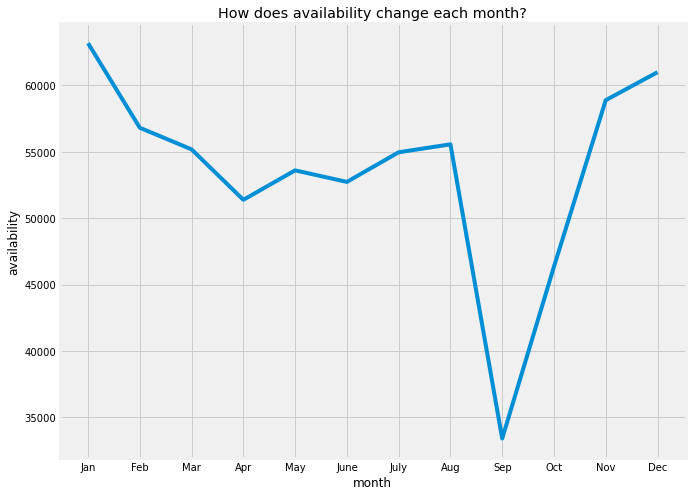

In [38]:
plt.figure(figsize=(10,8))
ax3 = sns.lineplot(x=availability_month.month, y=availability_month.availability_count)
ax3.set(xlabel='month', ylabel='availability', title='How does availability change each month?')
ax3.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
ax3.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [39]:
# avail by num rooms
calendar

,listing_id,date,available,price,day_of_week,month
0,12147973,2017-09-05,0,NaN,1,9
1,12147973,2017-09-04,0,NaN,0,9
2,12147973,2017-09-03,0,NaN,6,9
3,12147973,2017-09-02,0,NaN,5,9
4,12147973,2017-09-01,0,NaN,4,9
...,...,...,...,...,...,...
1308885,14504422,2016-09-10,0,NaN,5,9
1308886,14504422,2016-09-09,0,NaN,4,9
1308887,14504422,2016-09-08,0,NaN,3,9
1308888,14504422,2016-09-07,0,NaN,2,9


In [40]:
listings_beds = listings[['id', 'bedrooms']]
calendar = calendar.merge(listings_beds, left_on='listing_id', right_on='id', how='left')

In [41]:
calendar = calendar.drop(columns=['id'])
calendar

,listing_id,date,available,price,day_of_week,month,bedrooms
0,12147973,2017-09-05,0,NaN,1,9,2.0
1,12147973,2017-09-04,0,NaN,0,9,2.0
2,12147973,2017-09-03,0,NaN,6,9,2.0
3,12147973,2017-09-02,0,NaN,5,9,2.0
4,12147973,2017-09-01,0,NaN,4,9,2.0
...,...,...,...,...,...,...,...
1308885,14504422,2016-09-10,0,NaN,5,9,1.0
1308886,14504422,2016-09-09,0,NaN,4,9,1.0
1308887,14504422,2016-09-08,0,NaN,3,9,1.0
1308888,14504422,2016-09-07,0,NaN,2,9,1.0


In [42]:
def create_pd(filter_feature, groupby_feature, value):
    day_bed = calendar.loc[calendar[filter_feature] == value].groupby(groupby_feature)['available'].agg(['sum']).reset_index()
    day_bed.rename(columns={'sum':'availability_count'}, inplace=True)
    return day_bed

In [43]:
def create_plot(filter_feature, groupby_feature, value):
    df = create_pd(filter_feature, groupby_feature, value)
    return sns.lineplot(x=df.day_of_week, y=df.availability_count)

In [44]:
def create_plot_month(filter_feature, groupby_feature, value):
    df = create_pd(filter_feature, groupby_feature, value)
    return sns.lineplot(x=df.month, y=df.availability_count)

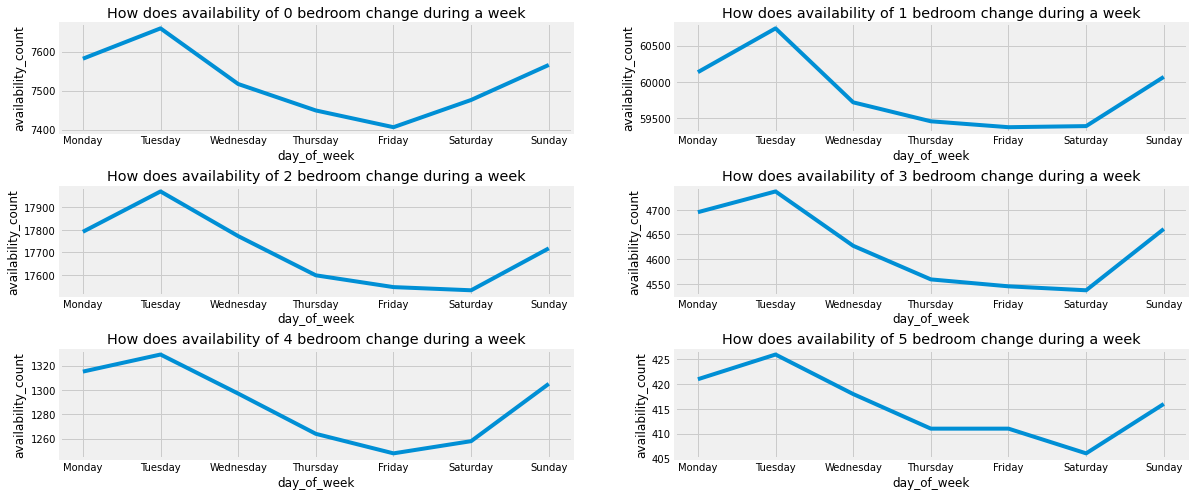

In [45]:
fig=plt.figure(figsize=(18,8))

for i in range(0,6): 
    plt.subplot(3,2,i+1)
    ax = create_plot('bedrooms', 'day_of_week', i)
    ax.set_title('How does availability of ' + str(i) + ' bedroom change during a week')
    ax.set_xticks([0,1,2,3,4,5,6])
    ax.set_xticklabels(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])

plt.subplots_adjust(hspace= 0.5)
plt.show()

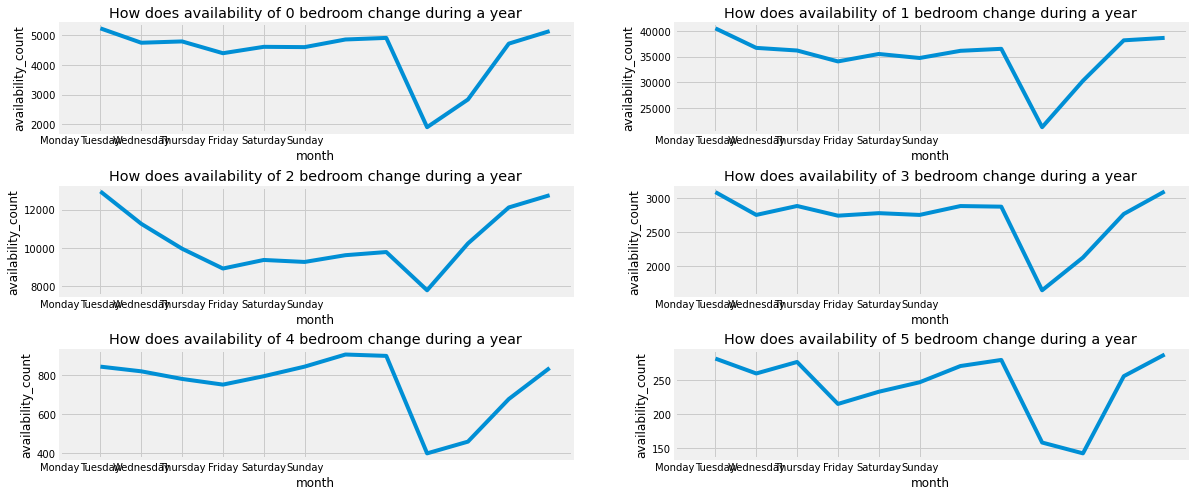

In [46]:
fig=plt.figure(figsize=(18,8))

for i in range(0,6): 
    plt.subplot(3,2,i+1)
    ax = create_plot_month('bedrooms', 'month', i)
    ax.set_title('How does availability of ' + str(i) + ' bedroom change during a year')
    ax.set_xticks([0,1,2,3,4,5,6])
    ax.set_xticklabels(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])

plt.subplots_adjust(hspace= 0.5)
plt.show()

In [47]:
listings_superhost = listings[['id','host_is_superhost']]
calendar = calendar.merge(listings_superhost, left_on='listing_id', right_on='id', how='left')
calendar = calendar.drop(columns=['id'])
calendar.head(5)

,listing_id,date,available,price,day_of_week,month,bedrooms,host_is_superhost
0,12147973,2017-09-05,0,NaN,1,9,2.0,f
1,12147973,2017-09-04,0,NaN,0,9,2.0,f
2,12147973,2017-09-03,0,NaN,6,9,2.0,f
3,12147973,2017-09-02,0,NaN,5,9,2.0,f
4,12147973,2017-09-01,0,NaN,4,9,2.0,f


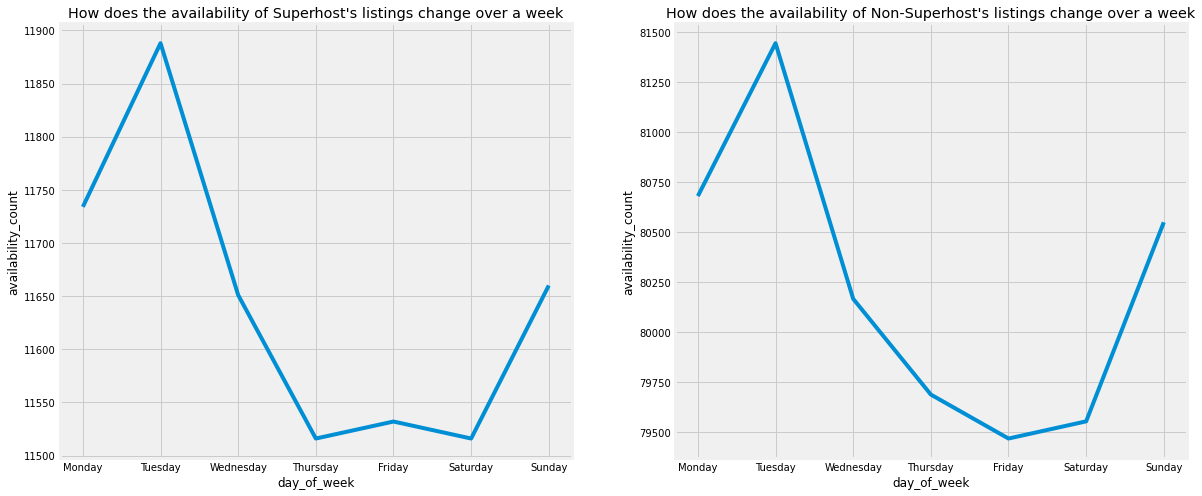

In [48]:
fig = plt.figure(figsize=(18,8))

plt.subplot(1,2,1)
ax = create_plot('host_is_superhost', 'day_of_week', 't')
ax.set_title('How does the availability of Superhost\'s listings change over a week')
ax.set_xticks([0,1,2,3,4,5,6])
ax.set_xticklabels(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])

plt.subplot(1,2,2)
ax1 = create_plot('host_is_superhost', 'day_of_week', 'f')
ax1.set_title('How does the availability of Non-Superhost\'s listings change over a week')
ax1.set_xticks([0,1,2,3,4,5,6])
ax1.set_xticklabels(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])

plt.show()

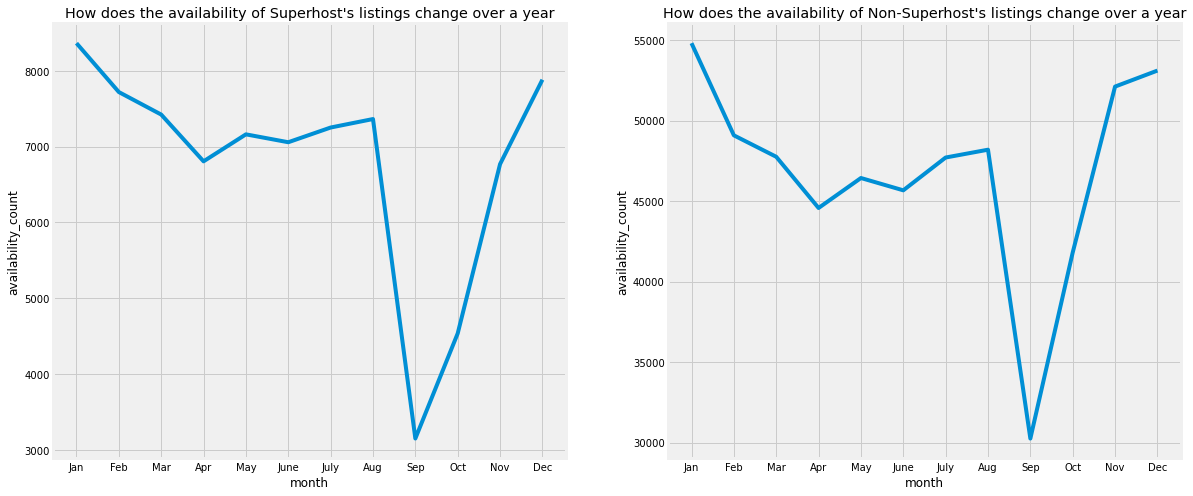

In [49]:
fig = plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
ax = create_plot_month('host_is_superhost', 'month', 't')
ax.set_title('How does the availability of Superhost\'s listings change over a year')
ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.subplot(1,2,2)
ax1 = create_plot_month('host_is_superhost', 'month', 'f')
ax1.set_title('How does the availability of Non-Superhost\'s listings change over a year')
ax1.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
ax1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.show()

In [50]:
del listings
del calendar

# Boston Airbnb's Pricing

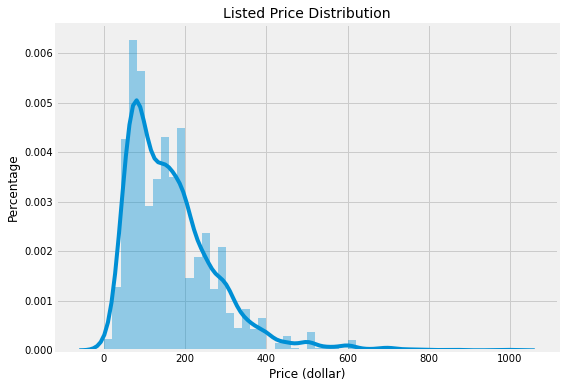

In [51]:
plt.figure(figsize=(8, 6))
sns.distplot(df_num['price'], bins=50, kde=True)
plt.ylabel('Percentage', fontsize=12)
plt.xlabel('Price (dollar)', fontsize=12)
plt.title('Listed Price Distribution', fontsize=14);

In [52]:
# we can see that some listed price are 1 dollar, which is not intuitive
df_num = df_num[df_num['price'] != 1]
# we will also exlude some outliers of the price > 1.5 IQR
df_num = df_num[df_num['price'] < 423]

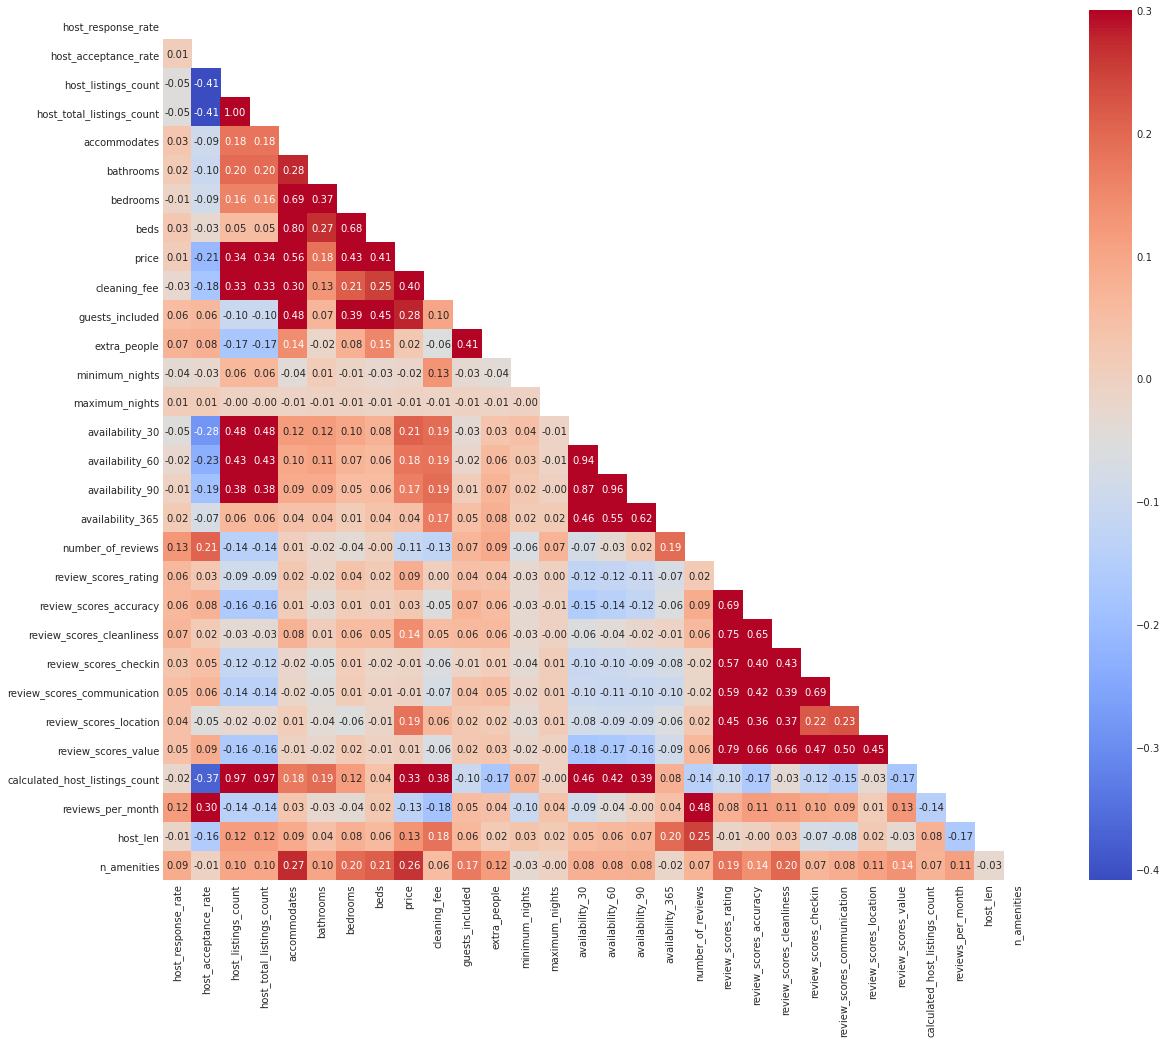

In [53]:
# visualize the correlation matrix
corr = df_num.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(18, 16))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True, fmt='.2f', cmap='coolwarm')

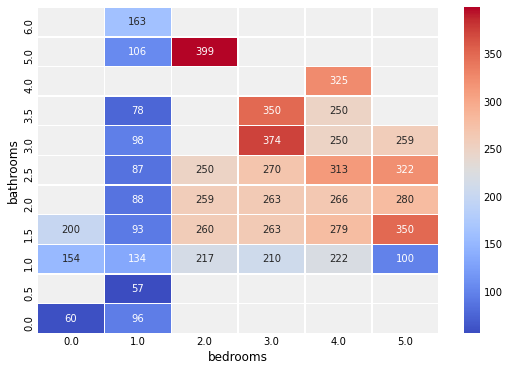

In [54]:
# visualizae the price
plt.figure(figsize=(8, 6))
sns.heatmap(df_num.groupby(['bathrooms', 'bedrooms']).mean()['price'].reset_index()\
                .pivot('bathrooms', 'bedrooms', 'price').sort_index(ascending=False),
            cmap="coolwarm", fmt='.0f', annot=True, linewidths=0.5);

In [55]:
# We will first extract the dataframe for word analysis
df_word = list_clean.loc[:,['description', 'price']]
df_word = df_word[df_word.price!=1] 
df_word = df_word[df_word.price<423] 
df_word.sample(5)

,description,price
2895,It's 300 yards from the front door to the JFK ...,100
3346,"Completely renovated 1,800 sq ft home with 4 b...",85
3122,My place is close to Andrew Station. You’ll lo...,75
2463,My place is a studio in the heart of Kenmore S...,139
1362,Within walking distance to the Prudential Cent...,207


In [56]:
# segment price into two groups 
bin_edges = [0, 84, 145, 205, 417]
bin_name = ['25%', '50%', '75%', '100%']
df_word['price_bin'] = pd.cut(df_word['price'], bins=bin_edges, labels=bin_name)

In [57]:
# get the post content for each price group
p_words = {};
for i in range(len(bin_name)):
    p_words[i] = ''
    df_i = df_word[df_word['price_bin'] == bin_name[i]]['description'].astype(str)
    for j in range(len(df_i)):
        words = df_i.iloc[j].split(' ')
        for word in words:
            p_words[i] += word+' '

In [58]:
# Get the most popular 20 words for each price group 
from collections import Counter
import string
counter = {}
occur = {}
stop_words = ['a', 'the', 'and', 'is', 'of', 'with', '', 'in', 'i', 'you', 'for', 'on', 'at', 'this', 'there', 
              'that', 'to', 'from', 'have', 'has', 'we', 'your', 'my', 'are', 'be', 'or', 'will', 'our', 'it',
             'located', 'all', 'as']
for i in range(len(bin_name)):
    words = p_words[i].lower().translate(str.maketrans('', '', string.punctuation)).split(' ')
    counter[i] = Counter([word for word in words if word not in stop_words])
    occur[i] = counter[i].most_common(20)
    
df1 = pd.DataFrame.from_dict(occur[0]).rename(columns={0:'word', 1:'count'})
df2 = pd.DataFrame.from_dict(occur[1]).rename(columns={0:'word', 1:'count'})
df3 = pd.DataFrame.from_dict(occur[2]).rename(columns={0:'word', 1:'count'})
df4 = pd.DataFrame.from_dict(occur[3]).rename(columns={0:'word', 1:'count'})

In [59]:
pd.DataFrame.from_dict(occur).rename(columns={0:'0%-25%', 1:'25%-50%', 2:'50%-75%', 3:'75%-100%'})

,0%-25%,25%-50%,50%-75%,75%-100%
0,"(room, 1389)","(boston, 1065)","(boston, 1145)","(boston, 1096)"
1,"(boston, 862)","(room, 952)","(apartment, 916)","(apartment, 975)"
2,"(kitchen, 673)","(apartment, 740)","(kitchen, 636)","(kitchen, 643)"
3,"(walk, 627)","(walk, 680)","(walk, 605)","(bedroom, 627)"
4,"(apartment, 536)","(kitchen, 621)","(bedroom, 600)","(room, 598)"
5,"(house, 504)","(bedroom, 591)","(room, 575)","(bed, 533)"
6,"(access, 451)","(private, 550)","(bed, 522)","(living, 508)"
7,"(line, 450)","(bed, 528)","(one, 489)","(•, 501)"
8,"(bed, 448)","(access, 480)","(street, 484)","(walk, 495)"
9,"(place, 441)","(bathroom, 437)","(living, 451)","(2, 422)"


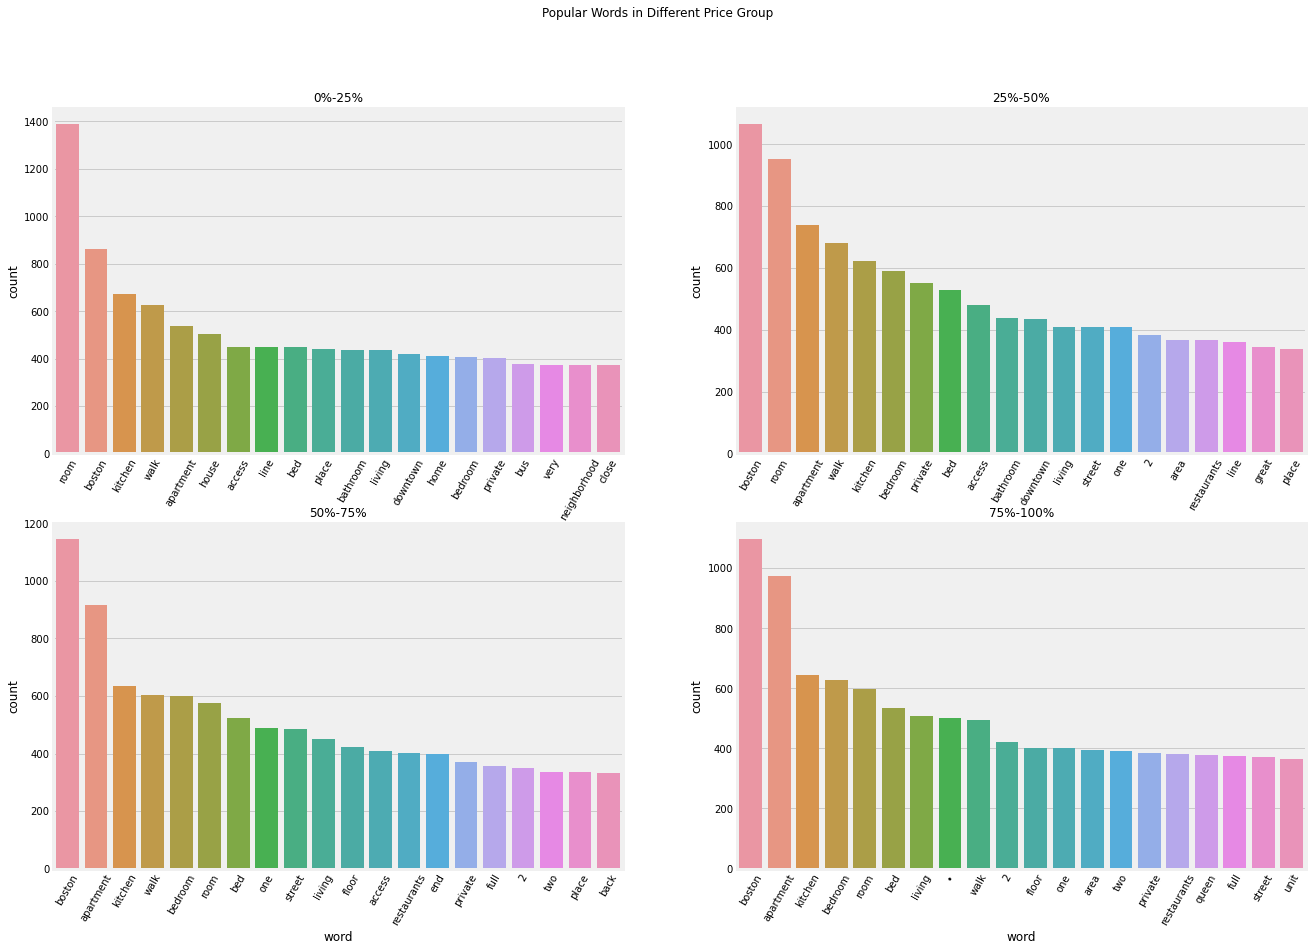

In [60]:
# visualization 
plt.figure(figsize=(20, 14))
plt.subplot(2, 2, 1)
ax1 = sns.barplot(data=df1, x='word', y='count')
plt.xticks(rotation=60)
plt.xlabel('')
plt.title('0%-25%', fontsize=12);

plt.subplot(2, 2, 2)
ax2 = sns.barplot(data=df2, x='word', y='count')
plt.xticks(rotation=60)
plt.xlabel('')
plt.title('25%-50%', fontsize=12)

plt.subplot(2, 2, 3)
ax2 = sns.barplot(data=df3, x='word', y='count')
plt.xticks(rotation=60)
plt.title('50%-75%', fontsize=12)

plt.subplot(2, 2, 4)
ax2 = sns.barplot(data=df4, x='word', y='count')
plt.xticks(rotation=60)
plt.title('75%-100%', fontsize=12)

plt.suptitle('Popular Words in Different Price Group');
